In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import statistics
import math
import csv

In [3]:
# Task 1
# Create 5 plots or charts to describe the data. 
# Each of the plots must be different from each other i.e Bar, pie, Scatter, line, Bubble
WS = pd.read_csv("Primary.csv")
WS = WS.rename(columns={'Residence':'Rural', 
                        'Unnamed: 7':'Urban',
                        'Wealth quintile':'Poorest', 
                        'Unnamed: 9': "Richest",
                        'Unnamed: 11':'Times period'})
WS = WS.dropna(subset=["Region", "Rural", "Urban", "Poorest", "Richest"]) # removing the columns that has an NAN
WS = WS.drop(WS[(WS['Times period'] > "2022")].index) # removing any unrealiable datas that has year > 2022
WS.reset_index(drop=True, inplace=True)
WS = WS.head(50) # getting the first 50 values
print(WS.columns)
# Change the data to integers instead of strings
# Remove the % sign
WS['Total'] = list(map(lambda x: x[:-1], WS['Total'].values))
WS['Rural'] = list(map(lambda x: x[:-1], WS['Rural'].values))
WS['Urban'] = list(map(lambda x: x[:-1], WS['Urban'].values))
WS['Poorest'] = list(map(lambda x: x[:-1], WS['Poorest'].values))
WS['Richest'] = list(map(lambda x: x[:-1], WS['Richest'].values))

WS['Total'] = [int(x) for x in WS['Total'].values]
WS['Rural'] = [int(x) for x in WS['Rural'].values]
WS['Urban'] = [int(x) for x in WS['Urban'].values]
WS['Poorest'] = [int(x) for x in WS['Poorest'].values]
WS['Richest'] = [int(x) for x in WS['Total'].values]
# print(WS)
WS_array = np.array(WS)
# np.savetxt("something.csv", WS_array, delimiter=',',fmt="%s")
# print(WS_array)
WS.head()

Index(['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Income Group',
       'Total', 'Rural', 'Urban', 'Poorest', 'Richest', 'Source',
       'Times period'],
      dtype='object')


,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural,Urban,Poorest,Richest,Source,Times period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),15,2,22,0,15,Demographic and Health Survey,2015-16
1,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,69,89,46,81,Demographic and Health Survey,2015-16
2,BGD,Bangladesh,SA,SA,Lower middle income (LM),34,30,49,7,34,Multiple Indicator Cluster Survey,2019
3,BRB,Barbados,LAC,LAC,High income (H),63,54,68,9,63,Multiple Indicator Cluster Survey,2012
4,BEN,Benin,SSA,WCA,Low income (L),3,1,6,0,3,Demographic and Health Survey,2017-18


/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


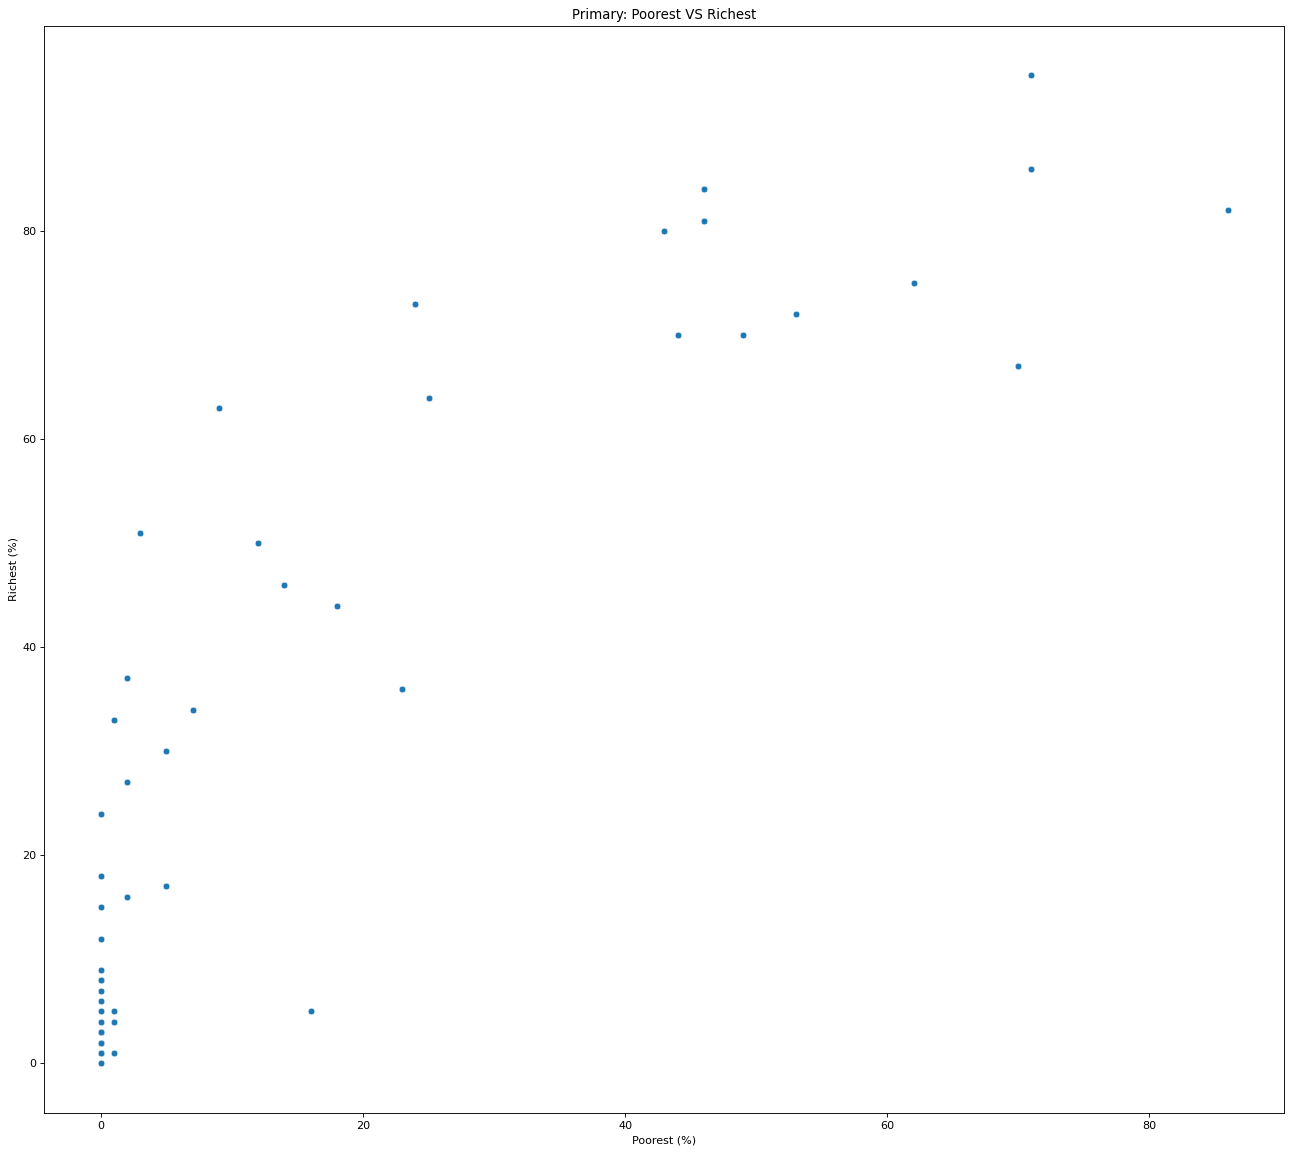

In [4]:
# Task 1 
# Creating a Scatter plot for the given data
# A Scatter plot for Poor vs Richest
# This shows the ratio between the Richest and the poorest for each country
figure(num=None, figsize=(20,18), dpi=80, facecolor='w')
Poorest = WS_array[:,8]
Richest = WS_array[:,9]
sns.scatterplot(Poorest, Richest)
plt.title("Primary: Poorest VS Richest") #title
plt.xlabel("Poorest (%)") #x label
plt.ylabel("Richest (%)") #y label
plt.savefig("Scatter_Plot.png")
plt.show()



/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


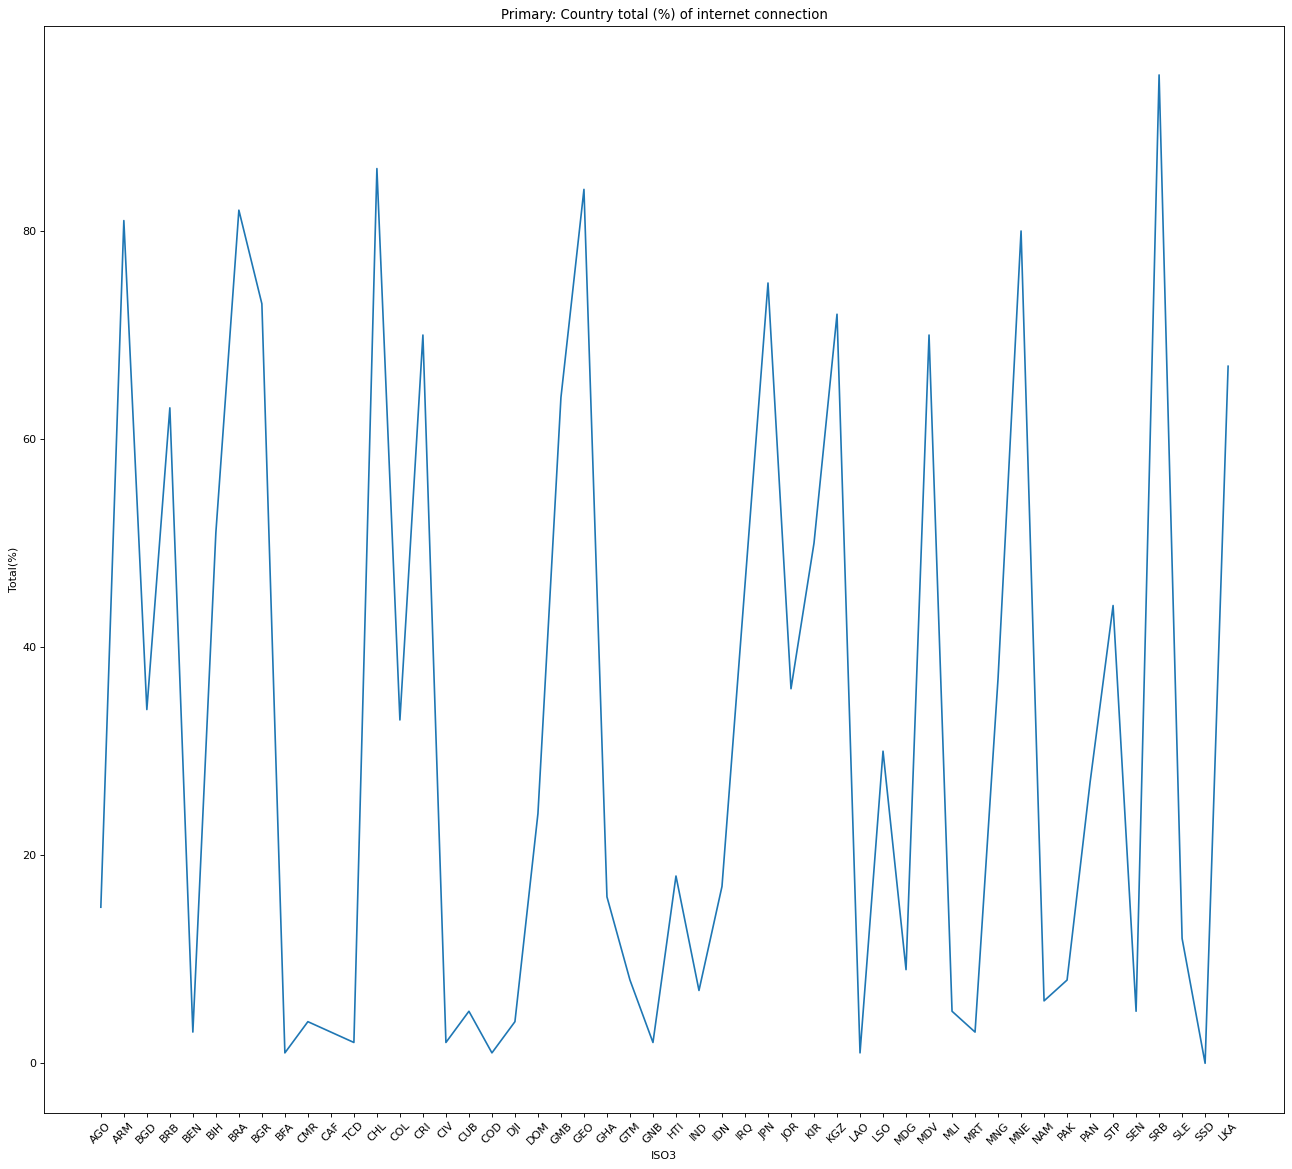

In [5]:
# Task 1 
# Creating a  line plot for the given data 
# Data = ISO3 and Total %
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
x = WS_array[:,0] # IS03 Country's sort form
y = WS_array[:,5] # Total

plt.title("Primary: Country total (%) of internet connection")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
plt.ylabel("Total(%)")
sns.lineplot(x,y)
plt.savefig("line_Graph.png")
plt.show()


/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


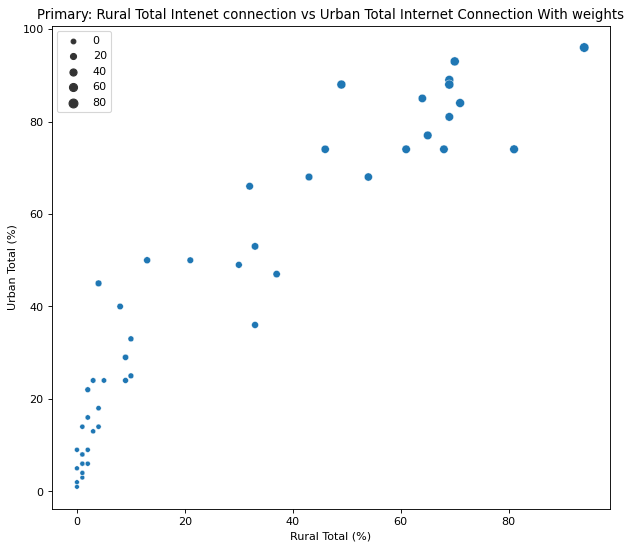

In [6]:
# Task 1
# Create a bubble graph to shows the consentration between Rural and Urban
# The weight is the total (%)
figure(num=None, figsize=(9,8), dpi=80, facecolor='w', edgecolor='r')
x = WS_array[:,6] # Rural
y = WS_array[:,7] # Urban
z = WS_array[:,5] # Total
plt.xlabel("Rural Total (%)")
plt.ylabel("Urban Total (%)")
plt.title("Primary: Rural Total Intenet connection vs Urban Total Internet Connection With weights")
sns.scatterplot(x,y,size=z)
plt.savefig("Bubble_Plot.png")
plt.show()


/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

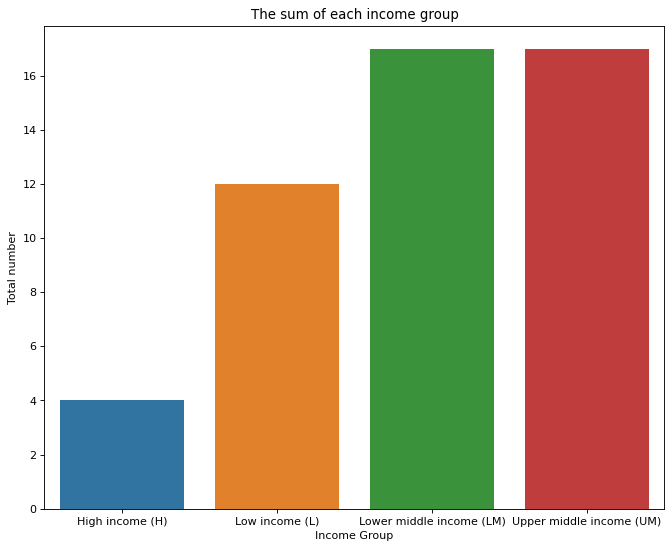

In [7]:
figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='r')
unique, counts = np.unique(WS_array[:,4], return_counts=True) # take all the unique values and count it
graph = np.asarray((unique, counts)).T # put it in a 2d array [name, count]
plt.title("The sum of each income group")
plt.xlabel("Income Group")
plt.ylabel("Total number")
sns.barplot(graph[:,0], graph[:,1])
plt.savefig("Bar_Graph.png")
plt.show


[['EAP' 5]
 ['ECA' 7]
 ['LAC' 10]
 ['MENA' 2]
 ['SA' 5]
 ['SSA' 21]]


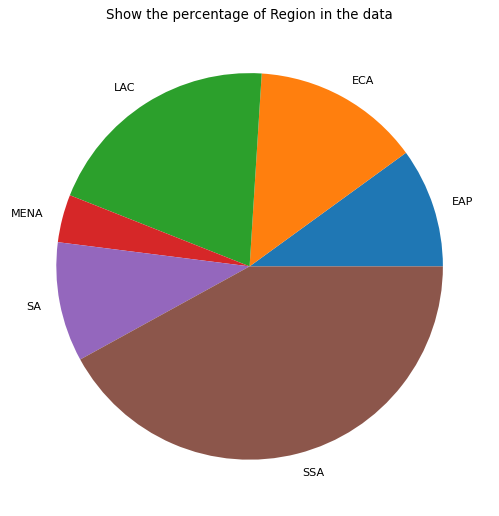

In [42]:
# Task 1
# Create a pie graph to shows the percentage of number of Region
figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='r')
unique, counts = np.unique(WS_array[:,2], return_counts=True)
graph = np.asarray((unique, counts)).T
print(graph)
plt.title("Show the percentage of Region in the data")
plt.pie(graph[:,1], labels=graph[:,0])
plt.savefig("Pie_Plot.png")
plt.show()


In [9]:
# Task 2
# Perform 2 different statistical operations for each of the types of data:
# ordinal, nominal, interval, and ratio

# with finding the mean and median Total

print(statistics.mean(WS_array[:,5]))
print(statistics.median(WS_array[:,5]))

mean_tot = statistics.mean(WS_array[:,5])
median_tot = statistics.median(WS_array[:,5])
tot_stat = np.array((mean_tot, median_tot))
# Find the mean and mode for Income Group
# First we need to identify this into integers 0 = L, 1 = LM, 2 = UM, 3 = H
IG_index = "Income Group"
SR_index = "Sub-region"
unique, counts = np.unique(WS_array[:,4], return_counts=True)
Income = np.array((unique, counts)).T
WS_copy = WS.copy(deep=True)
for i in range(len(Income)):
    WS_copy.loc[WS["Income Group"] == Income[i,0], IG_index] = i

unique_R, counts_R = np.unique(WS_array[:,3], return_counts=True)
label_region = np.array((unique_R, counts_R)).T
print(label_region)
for i in range(len(label_region)):
    WS_copy.loc[WS["Sub-region"] == label_region[i,0], SR_index] = i
# WS_copy.head()

WS_copy_array = np.array(WS_copy)
# print(WS_copy_array)
# np.savetxt("something.csv", WS_copy, delimiter=',',fmt="%s")
print(statistics.mean(WS_copy_array[:,4])) # mean

print(Income[np.argmax(Income[:,1]),0]) 
income_stat = np.array((statistics.mean(WS_copy_array[:,4]), Income[np.argmax(Income[:,1]),0]))

# Find the median and the mode of the years
unique, counts = np.unique(WS_array[:,11], return_counts=True)
Year = np.array((unique, counts)).T
year_copy = np.copy(Year[:,0])
# print(year_copy)
# print(len(year_copy)/2)
print(year_copy[math.floor(len(year_copy)/2)])
print(Year[np.argmax(Year[:,1]),0])
year_stat = np.array((year_copy[math.floor(len(year_copy)/2)],Year[np.argmax(Year[:,1]),0]))

# Nominal Statistical 
unique, counts = np.unique(WS_array[:,3], return_counts=True)
sub_Region = np.array((unique, counts)).T
print(sub_Region[np.argmax(sub_Region[:,1]),0]) #most frequent (mode)
sorted_sub_region = np.sort(WS_array[:,3])
print(sorted_sub_region[int(len(sorted_sub_region)/2)]) # median of sub_Region 
sub_region_stat = np.array((sub_Region[np.argmax(sub_Region[:,1]),0],sorted_sub_region[int(len(sorted_sub_region)/2)]))

with open('./216396764-216426744-T2.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(tot_stat)
    writer.writerow(income_stat)
    writer.writerow(year_stat)
    writer.writerow(sub_region_stat)




32.62
21.0
[['EAP' 5]
 ['EECA' 7]
 ['ESA' 6]
 ['LAC' 10]
 ['MENA' 2]
 ['SA' 5]
 ['WCA' 15]]
1.94
Lower middle income (LM)
2015-16
2018
WCA
LAC


In [10]:
# Task 3
# find the z-score and the min-max normalization for interval and ratio data sets
# graph it 
# use attributes Total, Year
# notice that year is in string value we need to convert this into a string
# however some of the values are like 2015-16. To change this to an integer value
# We would only care about the first 4 indexes of the values
WS_copy['Times period'] = list(map(lambda x: x[:4], WS['Times period'].values)) # only take the first 4 values of the value
WS_copy['Times period'] = [int(x) for x in WS_copy['Times period'].values]

#z-score
WS_copy['Times period zscore'] = stats.zscore(WS_copy['Times period']) # Finding the zscore for Year
WS_copy['Total zscore'] = stats.zscore(WS_copy["Total"]) # Finding the zscore for Total


# min-max norm
x = WS_copy['Times period'].values #returns a numpy array
WS_copy['Times period min-max norm'] = (x - x.min()) / (x.max() - x.min()) # min-max normalization for Year
y = WS_copy['Total'].values
WS_copy['Total min-max norm'] = (y - y.min()) / (y.max() - y.min()) # min-max normalization Total
print(WS_copy.count())
# Create 2 graphs to compare the original, zscore, and min-max norm
np.savetxt("something.csv", WS_copy, delimiter=',',fmt="%s")


ISO3                         50
Countries and areas          50
Region                       50
Sub-region                   50
Income Group                 50
Total                        50
Rural                        50
Urban                        50
Poorest                      50
Richest                      50
Source                       50
Times period                 50
Times period zscore          50
Total zscore                 50
Times period min-max norm    50
Total min-max norm           50
dtype: int64


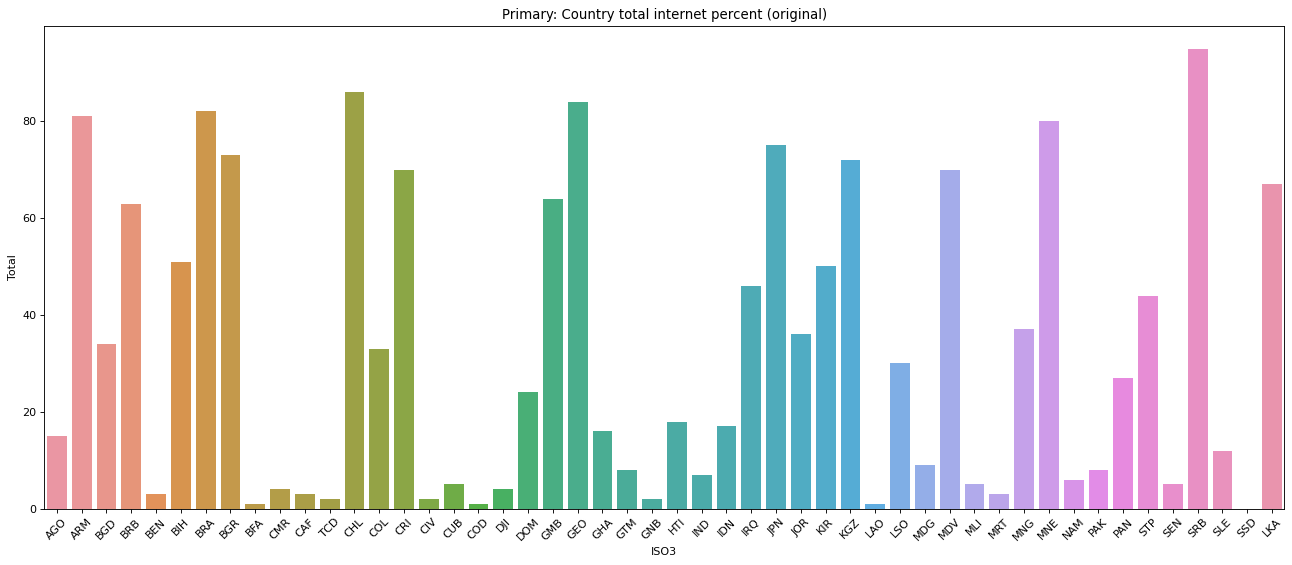

In [11]:
# Graphing Task 3
# Create 2 different types of graphs
# one is for Total, and the other is for Times period
# create a bar graph for each of them 
# y axis would be value (int) and x axis would be the IS03 (String)
# 3 different color bars to indicate which is original, zscore, min-max norm
figure(figsize=(20,8), dpi=80, facecolor='w')
T3_copy = WS_copy.copy(deep=True)
T3_copy = WS_copy[["ISO3", "Total", "Total zscore", "Total min-max norm"]]
plt.title("Primary: Country total internet percent (original)")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
plt.ylabel("Total(%)")
sns.barplot(x="ISO3", y="Total", data =T3_copy)
plt.savefig("Original_Total.png")
plt.show()


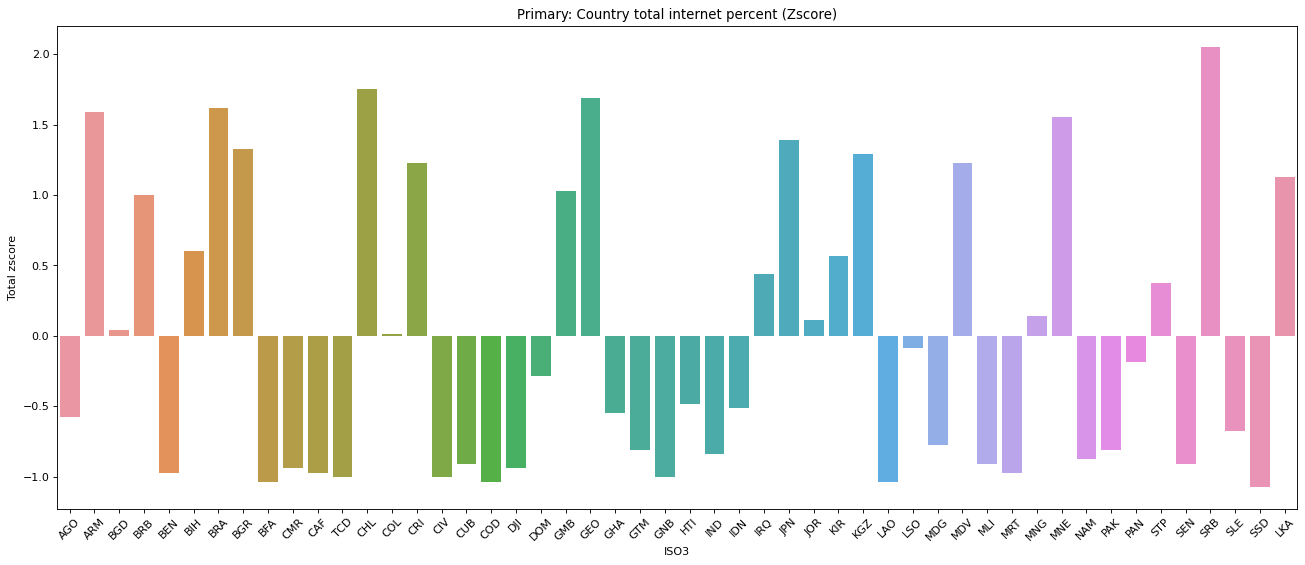

In [12]:
figure(figsize=(20,8), dpi=80, facecolor='w')
plt.title("Primary: Country total internet percent (Zscore)")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
plt.ylabel("Total(%)")
sns.barplot(x="ISO3", y="Total zscore", data =T3_copy)
plt.savefig("Zscore_Total.png")



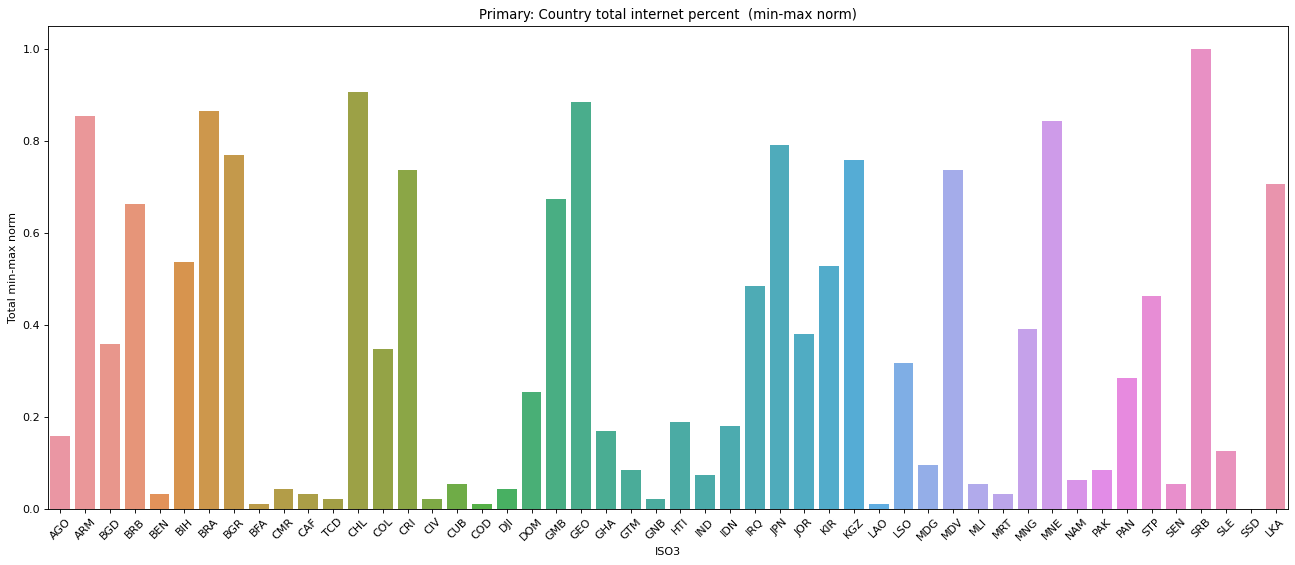

In [13]:
figure(figsize=(20,8), dpi=80, facecolor='w')
plt.title("Primary: Country total internet percent  (min-max norm)")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
plt.ylabel("Total(%)")
sns.barplot(x="ISO3", y="Total min-max norm", data =T3_copy)
plt.savefig("min-max_norm_Total.png")


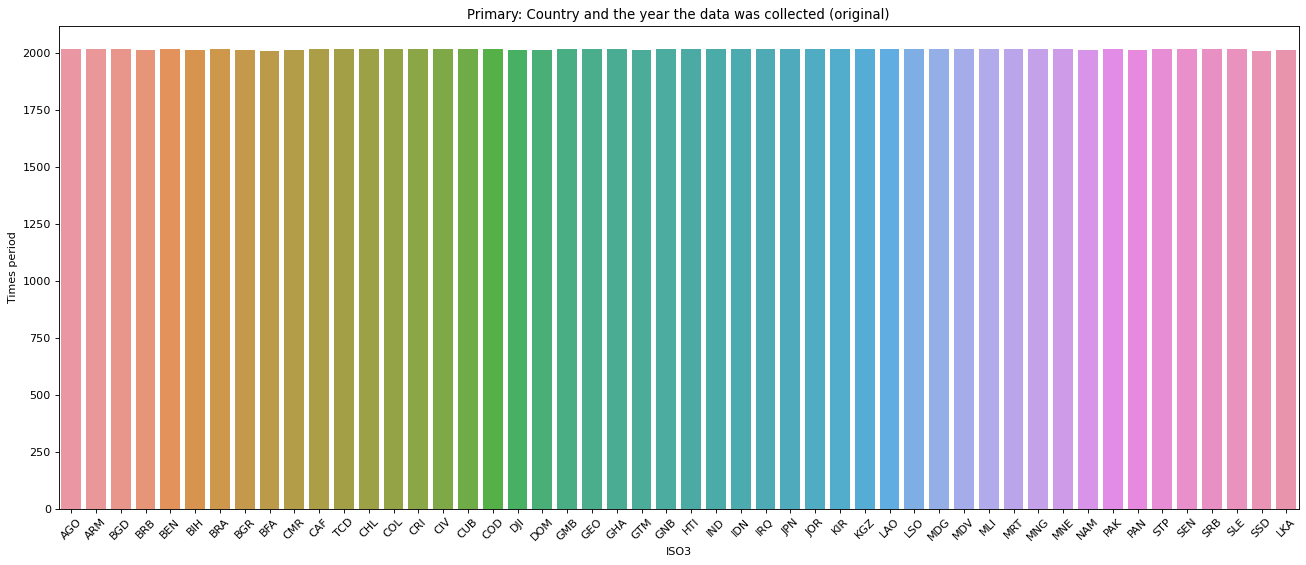

In [14]:
figure(figsize=(20,8), dpi=80, facecolor='w')
T31_copy = WS_copy.copy(deep=True)
T31_copy = WS_copy[["ISO3", "Times period", "Times period zscore", "Times period min-max norm"]]
plt.title("Primary: Country and the year the data was collected (original)")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
plt.ylabel("Year")
sns.barplot(x="ISO3", y="Times period", data =T31_copy)
plt.savefig("Original_Year.png")
plt.show()

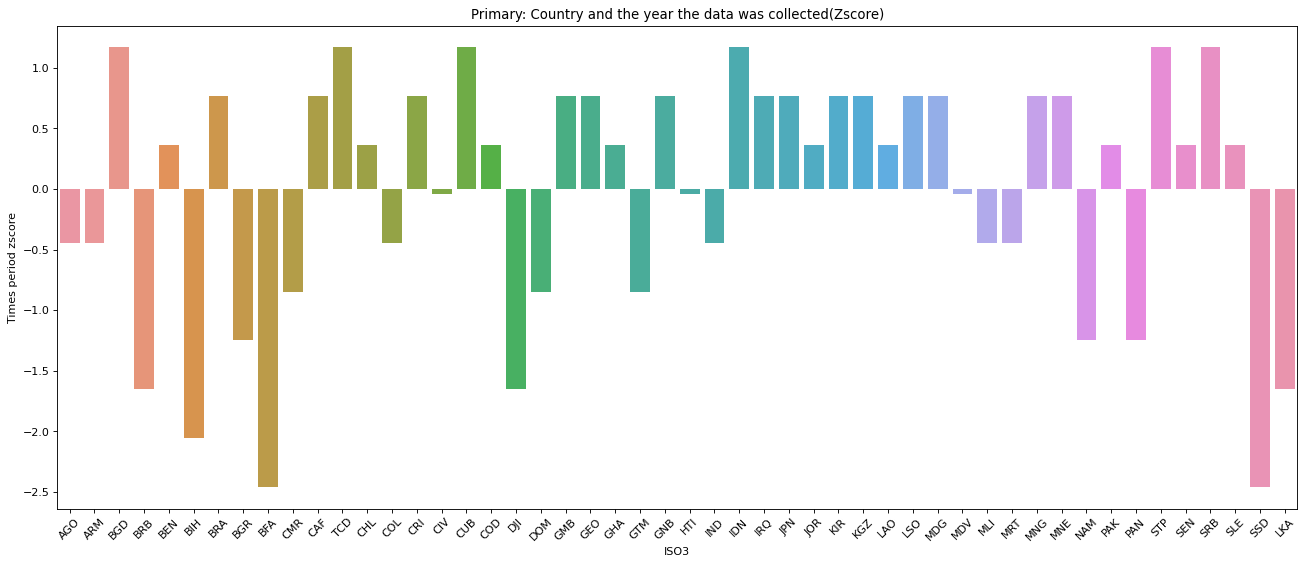

In [15]:
figure(figsize=(20,8), dpi=80, facecolor='w')
plt.title("Primary: Country and the year the data was collected(Zscore)")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
sns.barplot(x="ISO3", y="Times period zscore", data =T31_copy)
plt.savefig("Zscore_Year.png")


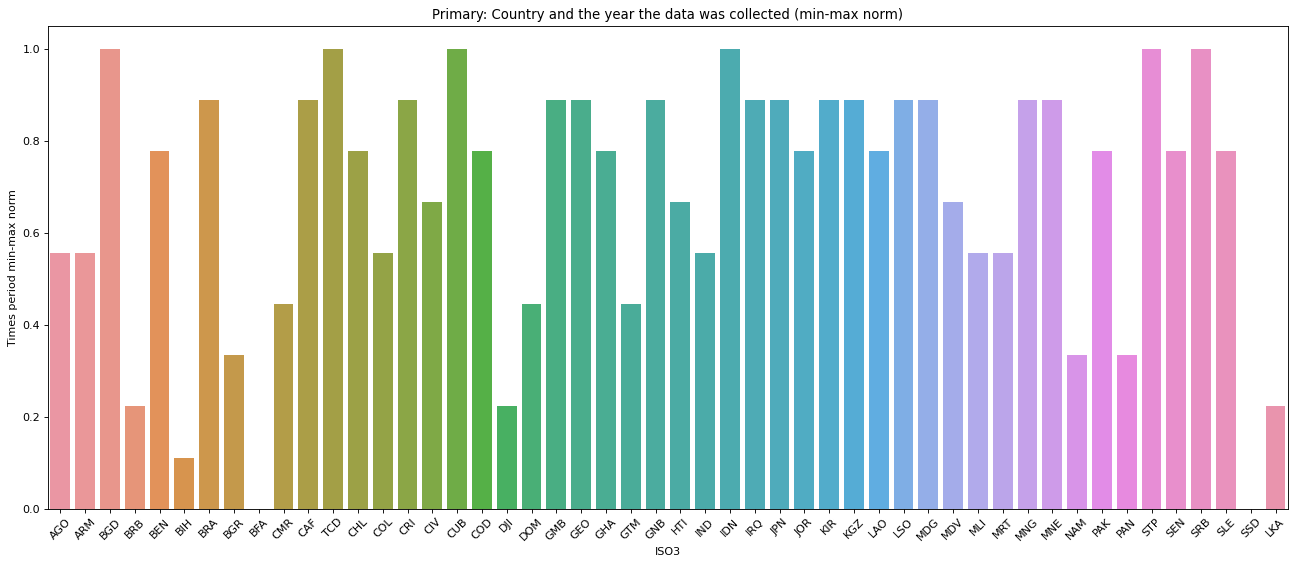

In [16]:
figure(figsize=(20,8), dpi=80, facecolor='w')
plt.title("Primary: Country and the year the data was collected (min-max norm)")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("ISO3")
sns.barplot(x="ISO3", y="Times period min-max norm", data =T31_copy)
plt.savefig("min-max_norm_Year.png")

In [17]:
WS_copy.head()
WS_copy.to_csv('./216396764-216426744-T3.csv')


In [18]:
# Task 4: Principal Component Analysis
# Choose 7 attributes: 'Income Group', 'Total', 'Rural', 'Urban', 'Poorest', 'Richest', 'Times period'
# We are gonna Perform the PCA onto the 7 attributes
# we first need to standardize the values 
T4_copy = WS_copy.copy(deep=True)
T4_copy = T4_copy[['Income Group', 'Total', 'Rural', 'Urban', 'Poorest', 'Richest', 'Times period']]


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Standardize the matrix 
# Scale down the matrix
# z = (x - u) / s, u - mean, s - varience
scalar = StandardScaler()
scalar.fit(T4_copy)
scaled_data = scalar.transform(T4_copy)


In [21]:
scaled_data

array([[ 0.06337243, -0.57840621, -0.81335067, -0.56703446, -0.67297173,
        -0.57840621, -0.44284333],
       [ 1.11957951,  1.58815507,  1.53960679,  1.58179523,  1.23322898,
         1.58815507, -0.44284333],
       [ 0.06337243,  0.04530083,  0.16997484,  0.29891183, -0.38289771,
         0.04530083,  1.16749604],
       [-2.04904174,  0.99727472,  1.01282527,  0.90828145, -0.30001942,
         0.99727472, -1.65059785],
       [-0.99283466, -0.97232644, -0.84846944, -1.08018782, -0.67297173,
        -0.97232644,  0.36232636],
       [ 1.11957951,  0.60335449,  0.62651882,  0.90828145, -0.54865429,
         0.60335449, -2.05318269],
       [ 1.11957951,  1.62098176,  0.83723143,  1.54972315,  2.89079481,
         1.62098176,  0.7649112 ],
       [ 1.11957951,  1.32554158,  1.39913172,  1.19693021,  0.32156777,
         1.32554158, -1.24801301],
       [-0.99283466, -1.03797981, -0.84846944, -1.17640408, -0.63153258,
        -1.03797981, -2.45576753],
       [ 0.06337243, -0.9394

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components= 2) # coverting our 7 dimension to 2 dimension
pca.fit(scaled_data)
x_pca=pca.fit_transform(scaled_data)

In [24]:
x_pca.shape

(50, 2)

In [25]:
x_pca


array([[-1.44671894,  0.39312404],
       [ 3.43787933,  1.01273009],
       [ 0.22322692, -0.95782862],
       [ 1.1457552 ,  0.60922679],
       [-2.11444827, -0.8523933 ],
       [ 0.94306036,  2.43943359],
       [ 3.95517753, -0.15434823],
       [ 2.50723741,  1.74196773],
       [-2.49781149,  1.6155237 ],
       [-2.02991393,  0.71052428],
       [-2.04338027, -1.20377091],
       [-2.03023442, -1.55942512],
       [ 3.61656279, -1.23567395],
       [-0.3843784 ,  0.94814383],
       [ 2.86962805, -0.08648986],
       [-2.06038036, -0.00590762],
       [-1.36857859, -0.60240127],
       [-2.2458267 , -0.86145872],
       [-2.09683315,  1.41524815],
       [-0.85943082,  1.27110308],
       [ 1.82214378, -1.0512327 ],
       [ 3.72686762, -0.03830773],
       [-1.13072818, -0.30987174],
       [-1.62532301,  1.22342853],
       [-2.12968148, -1.21060925],
       [-1.19106632, -0.43353751],
       [-1.76551152,  0.37018279],
       [-0.99418886, -1.02498744],
       [ 0.91423723,

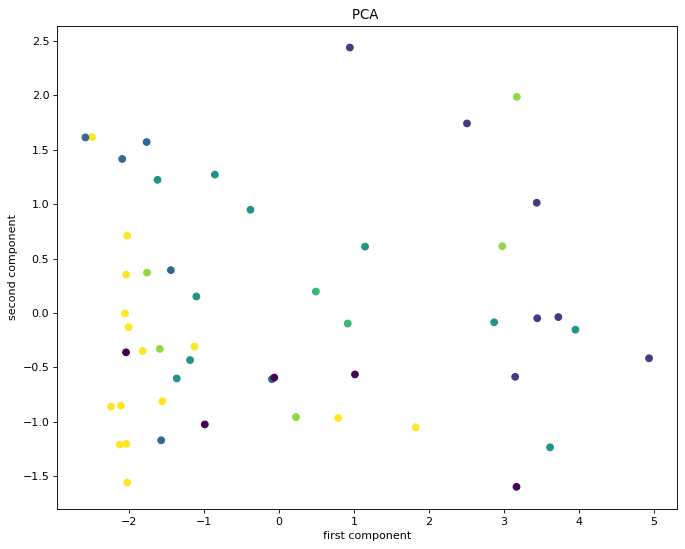

In [26]:
figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='r')
plt.scatter(x_pca[:,0], x_pca[:,1], c = WS_copy['Sub-region'], label=label_region[:,0])
plt.xlabel('first component')
plt.ylabel('second component')
plt.title('PCA ')
plt.savefig('PCA.png')

In [27]:
# Now continuing we need to find the Best PC for the given 7 attributes
# to do this we need to find the eigenvectors of the
# covariance matrix of the data. And choose the most varience, in other words 
# choose the highest Eignvector
# From before, we have standardized our values already which is scaled_data
# So we must find the cov(scaled_data)
from numpy.linalg import eig
cov_matrix = np.cov(scaled_data.T)
cov_matrix
# Calculate Eigenvalues and Eigenmatrix
eigenvalues, eigenvectors = eig(cov_matrix)
eigenvectors


array([[-1.47720645e-01, -4.69656266e-01,  8.69708723e-01,
         1.24675214e-02, -3.24478727e-02, -1.92157614e-04,
         4.44289662e-16],
       [-4.49985671e-01, -2.61196416e-02, -8.35536052e-02,
        -2.01775666e-01,  1.06718570e-01,  4.87593255e-01,
         7.07106781e-01],
       [-4.42331822e-01, -1.45860425e-02, -1.14451071e-01,
        -2.78590008e-02, -8.52003953e-01, -2.53660992e-01,
         1.13333868e-14],
       [-4.42426259e-01, -3.99373409e-02, -7.46617047e-02,
        -3.68594617e-01,  4.53423425e-01, -6.75007296e-01,
        -2.07103949e-15],
       [-4.12991647e-01,  5.75840280e-02, -4.38329750e-02,
         8.80537408e-01,  2.10547433e-01, -6.72629309e-02,
        -3.14268794e-15],
       [-4.49985671e-01, -2.61196416e-02, -8.35536052e-02,
        -2.01775666e-01,  1.06718570e-01,  4.87593255e-01,
        -7.07106781e-01],
       [-1.06037098e-01,  8.79167138e-01,  4.57219400e-01,
        -8.02089794e-02, -1.83212653e-02, -1.59624022e-03,
         2.4762141

In [28]:
# find the 2 highest eigenvectors
flat = eigenvectors.flatten()
flat = np.sort(flat)
print(flat[-1]) # best 
print(flat[-2]) # second
arr = np.array((flat[-1], flat[-2]))
with open('./216396764-216426744-T4.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(arr)



0.8805374075845582
0.8791671380123988


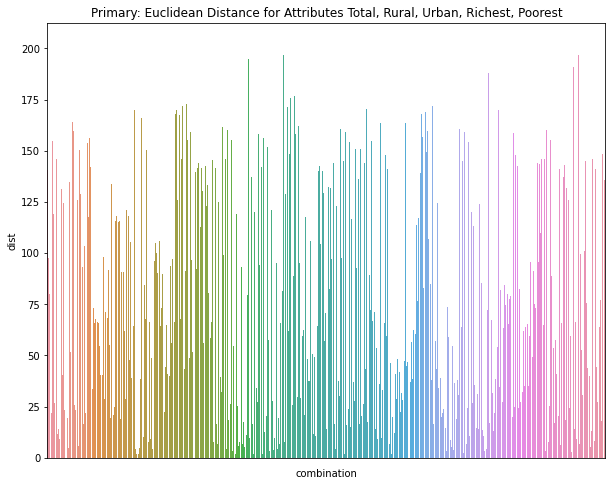

In [29]:
# Task 5: Similarity Measurement
# The data we would be using is Total, Rural, Urban, Richest, Poorest
T5_copy = WS_copy.copy(deep=True)
T5_copy = WS_copy[["Total", "Rural", "Urban", "Richest", "Poorest"]]
T5_array = np.array(T5_copy)
np.savetxt("216396764-216426744-T5Data.csv", T5_array, delimiter=',',fmt="%s")

# Find the euclidean distance for each of the object
dist = np.linalg.norm(T5_array - T5_array[:,None], axis=-1) # Euclidean distance matrix
np.savetxt("216396764-216426744-T5EU.csv", dist, delimiter=',',fmt="%s") # in matrix form
# create a bar graph to show the distribution 
EU = dist[np.triu_indices(len(dist), k=1)]
np.transpose(EU)
EU_data = pd.DataFrame(EU, columns = ['dist'])
EU_data["combination"] = EU_data.index + 1
figure(figsize=(10,8), facecolor='w')
plt.title("Primary: Euclidean Distance for Attributes Total, Rural, Urban, Richest, Poorest")
ax = sns.barplot(x='combination', y='dist', data =EU_data)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.savefig("Euclidean_Distance.png")



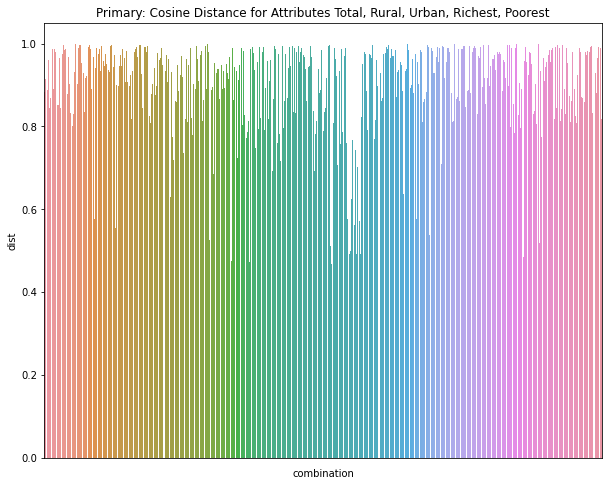

In [30]:

# Find the Cosine distance 
T5_copy = WS_copy.copy(deep=True)
T5_copy = WS_copy[["Total", "Rural", "Urban", "Richest", "Poorest"]]
T5_copy.head()
A_sparse = sparse.csr_matrix(T5_array)
similarities = cosine_similarity(A_sparse)
np.savetxt("216396764-216426744-T5CO.csv", similarities, delimiter=',',fmt="%s") # in matrix form
# create a bar graph to show the distribution 

CO = similarities[np.triu_indices(len(similarities), k=1)]
np.transpose(CO)
CO_data = pd.DataFrame(CO, columns = ['dist'])
CO_data["combination"] = CO_data.index + 1
figure(figsize=(10,8), facecolor='w')
plt.title("Primary: Cosine Distance for Attributes Total, Rural, Urban, Richest, Poorest")
ax = sns.barplot(x='combination', y='dist', data =CO_data)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.savefig("Cosine_distance.png")

/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_3692/1878338374.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T5_copy['mahalanobis'] = mahalanobis(x=T5_copy, data=T5_copy[['Total', 'Rural', 'Urban', 'Richest', 'Poorest']])
/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_3692/1878338374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

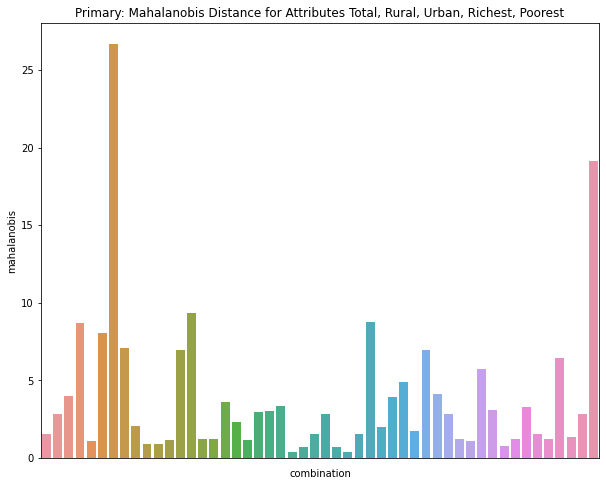

In [31]:

# Find the Mahalonobis distance
# mahalanobis(x,y) = (x-y)cov((x-y)^T) Textbook page 78 Chapter 2.4.6
T5_copy = WS_copy.copy(deep=True)
T5_copy = WS_copy[["Total", "Rural", "Urban", "Richest", "Poorest"]]
T5_copy.head()

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()
T5_copy['mahalanobis'] = mahalanobis(x=T5_copy, data=T5_copy[['Total', 'Rural', 'Urban', 'Richest', 'Poorest']])
np.savetxt("216396764-216426744-T5MA.csv", T5_copy, delimiter=',',fmt="%s") # in matrix form
# #Graphing 
MA_data = T5_copy[['mahalanobis']]
MA_data["combination"] = MA_data.index + 1 
figure(figsize=(10,8), facecolor='w')
plt.title("Primary: Mahalanobis Distance for Attributes Total, Rural, Urban, Richest, Poorest")
ax = sns.barplot(x='combination', y='mahalanobis', data = MA_data)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.savefig("Mahalanobis_Distance.png")


In [32]:
# Task 6: Classification
# We are gonna use the Euclidean distance to classify the values
# In this part we are only using, "Total", "Poorest", "Richest"
from sklearn.metrics import accuracy_score
T6_copy = WS_copy.copy(deep=True)
T6_copy = T6_copy[['Total', 'Poorest', 'Richest']]
# T6_copy.head()
# Divide the values


In [33]:
# For the k-means
# We choose k datapoints uniformly at random from 
# the dataset as my initial centers ("uniform")
import random as rd
class k_mean_clusters:
    # input: data, k
    # k is the number clusters
    def __init__(self, k):
        self.k = k
    def euclidean(self, data):
        self.center = []
        j = rd.randint(0,len(data)-1)
        self.center.append(data[j])
        
        for i in range(self.k-1):
            
            max_total = -math.inf

            for point in data:
                total_distance = 0
                for c in self.center:
                    total_distance += np.linalg.norm(point - c)
                if total_distance > max_total:
                    max_total = total_distance
                    next_center = point
            self.center.append(next_center)
        return np.array(self.center)

    def get_labels(self,data): # define the label
        labels = []
        for point in data:
            min_dist = float('inf')
            label = None
            for i , center in enumerate(self.center):
                new_dist = np.linalg.norm(point  - center)
                if min_dist > new_dist:
                    min_dist = new_dist
                    label = i
            labels.append(label)
        return labels

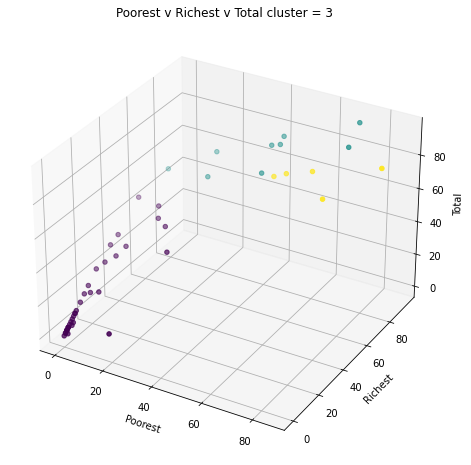

In [34]:
matrixArr = np.array(T6_copy.values)
k = k_mean_clusters(3)
center = k.euclidean(matrixArr)
cluster = k.get_labels(matrixArr)
T6_copy['class'] = cluster
np.savetxt("216396764-216426744-T6Data.csv", T6_copy, delimiter=',',fmt="%s")
T6_copy.head()
fig = figure(figsize=(10,8), facecolor='w')
ax = fig.add_subplot(111, projection = '3d')

x = T6_copy['Poorest']
y = T6_copy['Richest']
z = T6_copy['Total']

ax.set_xlabel("Poorest")
ax.set_ylabel("Richest")
ax.set_zlabel("Total")

ax.scatter(x, y, z, c = cluster)
plt.title('Poorest v Richest v Total cluster = 3')
plt.savefig('k-means.png')
plt.show()

In [35]:
#imports for decision tree
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [36]:
# use the training data and testing data to create a decision Tree
# Lets have the the 'class' be the true values to help create the decision
# Tree.
X = T6_copy[['Total', 'Poorest', 'Richest']] # the data
t = T6_copy[['class']] # the label classifier (true values)
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.3, random_state=1) # ratio 15 testing and 35 training

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train) # fit the Training for X and y to get decision tree


[Text(0.3333333333333333, 0.875, 'X[2] <= 57.5\ngini = 0.336\nsamples = 35\nvalue = [28, 5, 2]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= 58.0\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 84.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

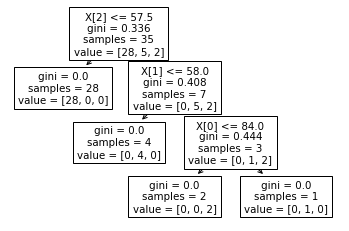

In [38]:
tree.plot_tree(clf) # plot the tree

In [39]:
y_pred = clf.predict(X_test) # make prediction for training data X
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)) # calcuate the accuracy with the predicted and the test

[0 0 1 0 0 1 0 2 1 0 1 0 1 1 0]
Accuracy: 0.8666666666666667
